In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def df_read(path_read):
    df= pd.read_csv(path_read, index_col = False)
    print(path_read)
    #print(df.columns)
    return df

In [2]:
path_read="pipenv/tmp/df_selected.csv"
df= df_read(path_read)
df.head()

pipenv/tmp/df_selected.csv


,id,is_rental,is_commercial,rent,price,num_bedrooms,area,x,y,num_rooms,num_bathrooms,pets,ownership_id,is_new_development,common_charges,is_furnished,financing_allowed,commission
0,894458,1,0,7495.0,NaN,1.0,NaN,-73.981728,40.739754,3.0,1.5,5.0,17.0,0,NaN,1,100.0,NaN
1,70266,1,0,4000.0,NaN,1.0,NaN,-73.981546,40.770500,NaN,1.0,5.0,13.0,0,NaN,0,100.0,NaN
2,582563,1,0,4250.0,NaN,2.0,900.0,-73.969912,40.752026,3.0,1.0,1.0,13.0,0,NaN,0,100.0,NaN
3,899351,1,0,5800.0,NaN,3.0,NaN,-73.941619,40.815527,5.0,2.0,1.0,17.0,0,NaN,0,100.0,NaN
4,869861,0,0,NaN,549000.0,0.0,NaN,-73.984229,40.749278,1.0,1.0,1.0,3.0,0,NaN,0,100.0,NaN


In [3]:
path_read="pipenv/tmp/distances.csv"
df_distances= df_read(path_read)
df_distances.head()

pipenv/tmp/distances.csv


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.067913,0.081872,0.089501,0.094804,0.098792,0.102901,0.103810,0.103818,0.107099,...,0.366235,0.368725,0.369719,0.369989,0.371294,0.373380,0.375384,0.376885,0.379788,0.385562
1,0.0,0.029024,0.041733,0.041768,0.049613,0.049947,0.050060,0.050314,0.050646,0.050998,...,0.337004,0.337005,0.337009,0.337019,0.337021,0.337022,0.337029,0.337040,0.337070,0.337072
2,0.0,0.017813,0.048666,0.056134,0.056134,0.058841,0.061713,0.063833,0.074532,0.075800,...,0.290235,0.291362,0.292933,0.299219,0.300182,0.301264,0.302893,0.311020,0.317458,0.332322
3,0.0,0.002314,0.003405,0.063095,0.068902,0.071107,0.091045,0.116798,0.128453,0.143372,...,0.350088,0.360201,0.363247,0.363306,0.365005,0.365005,0.365005,0.365005,0.369950,0.370023
4,0.0,0.047984,0.051295,0.061766,0.061875,0.078671,0.080356,0.085562,0.131013,0.152095,...,0.319435,0.320925,0.322809,0.324206,0.325574,0.326476,0.328729,0.328850,0.329336,0.329360


In [4]:
path_read="pipenv/result/rank.csv"
df_rank= df_read(path_read)
df_rank.head()

pipenv/result/rank.csv


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,894458,544270,73289,857043,52727,855703,861741,252693,815204,813865,...,909455,802600,749743,841098,57979,792927,800682,30302,909547,58087
1,70266,595358,623128,708233,884527,863109,888808,73618,49327,889421,...,651541,792816,824037,30299,30334,792815,831715,30301,30300,884031
2,582563,737072,596782,869875,901407,808494,887351,907147,43098,908363,...,794244,908865,756720,806242,906529,909455,749743,57979,41795,900151
3,899351,73662,899332,908332,866803,887405,792851,824030,857472,792811,...,24058,909455,791229,864030,34827,34825,34826,34820,805041,66432
4,869861,892727,752238,793352,898070,742664,62334,822505,755390,847747,...,836041,817995,757712,805492,877093,375581,843360,818037,715050,838468


In [5]:
def mrr(df):#mean reciprocal rank
    #print(df.head())
    for i in df.index:
        df.loc[i]= df.loc[i]/(int(i)+1)
    #print(df.head())
    return df.mean()

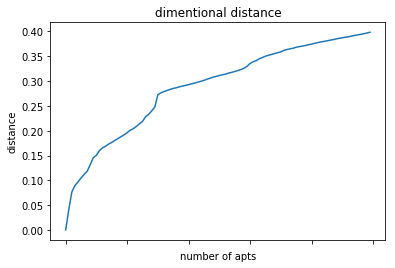

mean reciprocal rank distance:  0.007573333975500126


In [6]:
df_distances_mean= df_distances.mean()
ax= df_distances_mean.plot(title="dimentional distance")
ax.set_xlabel("number of apts")
ax.set_ylabel("distance")
plt.show()

print("mean reciprocal rank distance: ", mrr(df_distances_mean))

In [7]:
def single_feature(feature):
    def get_val(id):
        val= df[ df['id']== id ][feature].values[0]
        return val

    def func(row):
        row= row.apply( lambda id: get_val(id) )
        return row

    return df_rank.apply(func, axis=1)  

def feature_analysis(feature):

    df= single_feature(feature)

    """
    # abs error
    for col in df.columns.tolist()[1:]:
        col= str(col)
        df[col]= abs(df[col]-df['0'])/df['0'] #pertage error
    #print(df_rent.head())    
    """
    df= df.dropna()

    b= df['0'].values #numpy array
    def func(col):
        a= col.values #numpy array
        rmsr= mean_squared_error(a, b)**.5
        return rmsr
    rmsr= df.apply(func)
    df_rmsr= pd.DataFrame(rmsr)
    #print(df_rmsr)
    
    #df_rmsr[1:].plot()
    ax= df_rmsr.plot(title=feature)
    ax.set_xlabel("number of apts")
    ax.set_ylabel("RMSE")
    plt.show()

    print(feature, "mean reciprocal rank RMSE: ", mrr(df_rmsr))

In [8]:
#f= 'rent'
#feature_analysis(f)

['is_rental', 'is_commercial', 'rent', 'price', 'num_bedrooms', 'x', 'y', 'num_bathrooms', 'pets', 'ownership_id', 'is_new_development', 'is_furnished', 'financing_allowed']


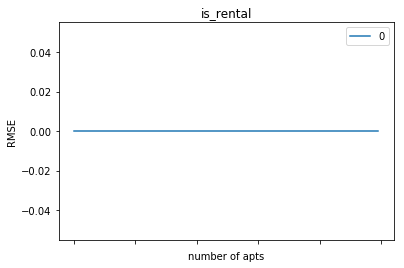

is_rental mean reciprocal rank RMSE:  0    0.0
dtype: float64


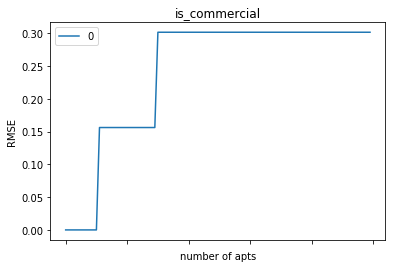

is_commercial mean reciprocal rank RMSE:  0    0.005118
dtype: float64


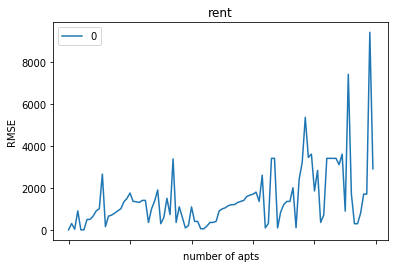

rent mean reciprocal rank RMSE:  0    36.574625
dtype: float64


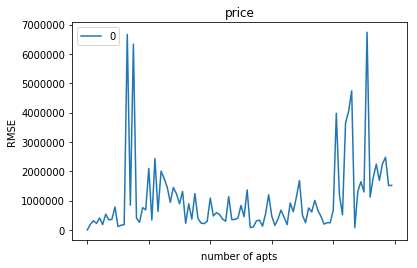

price mean reciprocal rank RMSE:  0    33139.097059
dtype: float64


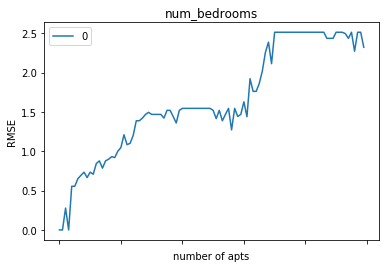

num_bedrooms mean reciprocal rank RMSE:  0    0.038816
dtype: float64


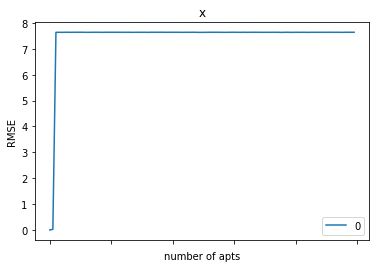

x mean reciprocal rank RMSE:  0    0.28182
dtype: float64


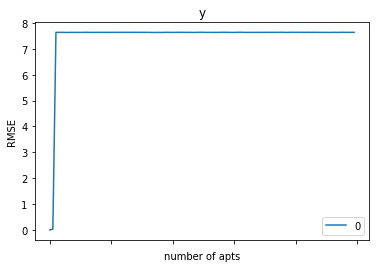

y mean reciprocal rank RMSE:  0    0.281832
dtype: float64


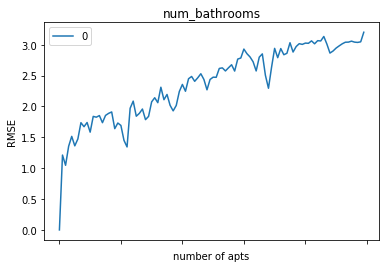

num_bathrooms mean reciprocal rank RMSE:  0    0.07585
dtype: float64


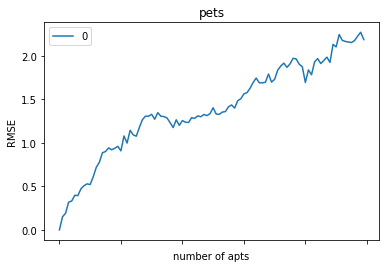

pets mean reciprocal rank RMSE:  0    0.034057
dtype: float64


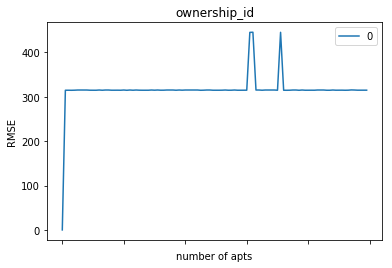

ownership_id mean reciprocal rank RMSE:  0    13.252881
dtype: float64


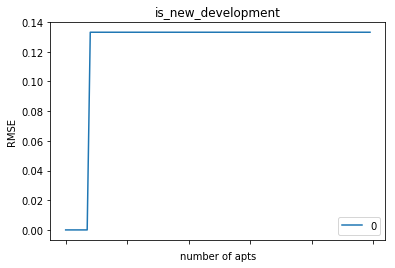

is_new_development mean reciprocal rank RMSE:  0    0.003289
dtype: float64


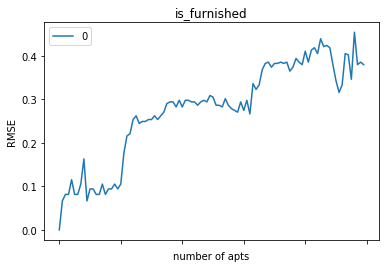

is_furnished mean reciprocal rank RMSE:  0    0.006992
dtype: float64


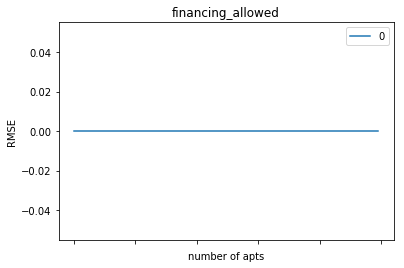

financing_allowed mean reciprocal rank RMSE:  0    0.0
dtype: float64


In [9]:
#features= df.columns.tolist()[1:]# df['0']= id
features= ['is_rental', 'is_commercial', 'rent', 'price', 'num_bedrooms', 'x', 'y', 'num_bathrooms', 'pets', 'ownership_id', 'is_new_development', 'is_furnished', 'financing_allowed']
print(features)
for f in features[:]:
    try: 
        feature_analysis(f)
    except:
        print(f, "plot fail")